Image + Audio ➡️ MEG ➡️ LLM

In [1]:
!pip install transformers torchaudio opencv-python matplotlib ffmpeg-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

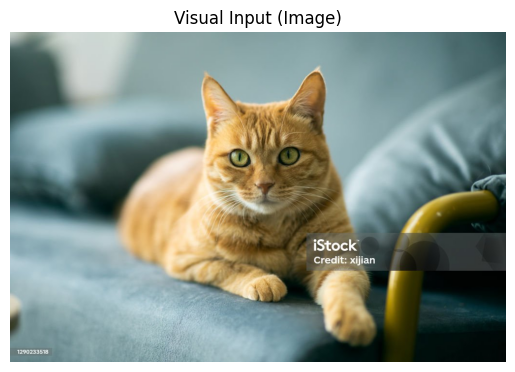

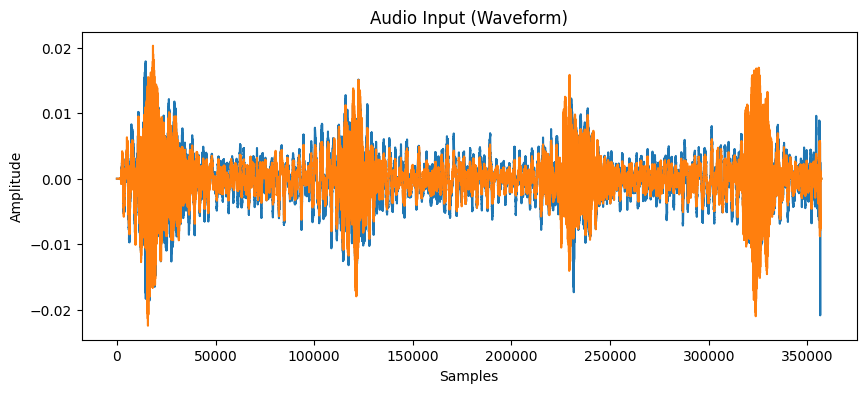

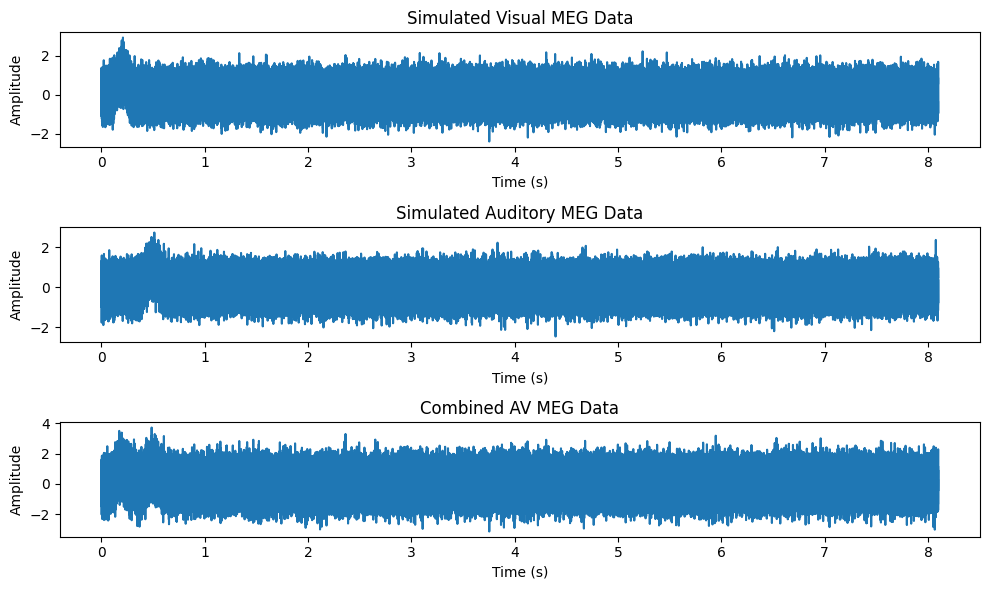

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


🧠 LLM Interpretation: I saw and heard a cat.

MEG: Visual


In [2]:


# Imports
import torch
import torchaudio
import cv2
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from google.colab import files
import numpy as np

# 1. Upload an image and audio file
image_file = '/content/cat.jpg'  # Example: replace with your file
audio_file = '/content/cat_meows.mp3'  # Example: replace with your file

# 2. Display the image
img = cv2.imread(image_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Visual Input (Image)")
plt.axis("off")
plt.show()

# 3. Display the audio waveform
waveform, sample_rate = torchaudio.load(audio_file)
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.title("Audio Input (Waveform)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

# 4. Simulate MEG data
n_samples = len(waveform[0])  # Number of samples in audio
time = np.linspace(0, n_samples / sample_rate, n_samples)

# Simulating a visual response (sharp spike in occipital cortex)
visual_response = np.random.normal(0, 0.5, n_samples)
visual_activation = np.exp(-((time - 0.2) ** 2) / (2 * 0.05**2))  # Visual activation at 0.2s
visual_data = visual_response + visual_activation

# Simulating an auditory response (broadband activity in auditory cortex)
auditory_response = np.random.normal(0, 0.5, n_samples)
auditory_activation = np.exp(-((time - 0.5) ** 2) / (2 * 0.05**2))  # Auditory activation at 0.5s
auditory_data = auditory_response + auditory_activation

# Combined response (AV)
combined_data = visual_data + auditory_data

# Plot simulated MEG data
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(time, visual_data)
plt.title('Simulated Visual MEG Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(time, auditory_data)
plt.title('Simulated Auditory MEG Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(time, combined_data)
plt.title('Combined AV MEG Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# 5. Create the prompt for GPT-2
prompt = """
MEG: Visual spike in occipital cortex (~100ms), Auditory spike in auditory cortex (~300ms).
Response: I saw and heard a cat.

MEG: Visual and auditory co-activation with frontal synchronization.
Response: I recognized a cat making a sound.

MEG: Visual input detected in occipital cortex (sharp spike ~100ms).
Audio input detected in auditory cortex (broadband activity ~300ms).
Combined AV response suggests object recognition and semantic retrieval.
Response:"""

# 6. Load and run GPT-2 model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Tokenize the input prompt and generate a response
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# Set `max_new_tokens` to specify the number of new tokens to generate
output = model.generate(
    input_ids,
    max_new_tokens=50,  # Adjust the number of tokens generated
    temperature=0.7,
    pad_token_id=tokenizer.eos_token_id
)

# Decode the output and print the response
decoded = tokenizer.decode(output[0], skip_special_tokens=True)
response = decoded.split("Response:")[-1].strip()
print("🧠 LLM Interpretation:", response)
